In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from scipy.optimize import minimize_scalar

The optimal U is  5.000000000000001
and was found at (A,B) = (4.99999995919733, 5.00000008160534)
The optimal U is  6.666666666666667
and was found at (A,B) = (6.666666630651958, 6.666666738696083)


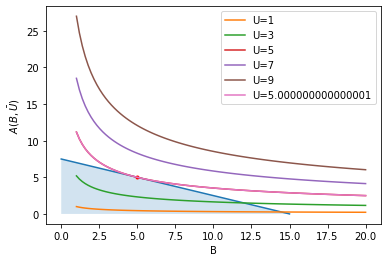

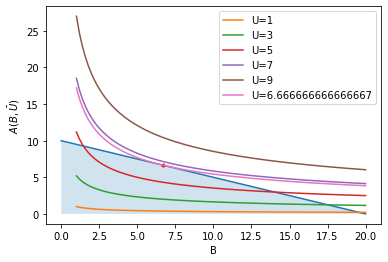

In [19]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

def runItAll(budget):
    def A_indifference(B, ubar, alpha=1/3):
        return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

    def plot_indif(ax, utility, alpha=1/3):
        label = "U="+str(utility)
        ax.plot(B, A_indifference(B, utility, alpha), label=label)
        ax.legend(loc='best')

    def plot_indifference_curves(ax, alpha=1/3):
        ubar = np.arange(1, 11, 2)
        for i in ubar:
            plot_indif(ax, i)
        ax.set_xlabel("B")
        ax.set_ylabel(r"$A(B, \bar{U}$)")
        
    def A_bc(B, budget, price_a=2):
        "Given B, W, and pa return the max amount of A our consumer can afford"
        return (budget - B) / price_a

    def plot_budget_constraint(ax, budget, price_a=2):
        B_bc = np.array([0, budget])
        A = A_bc(B_bc, budget, price_a)
        ax.plot(B_bc, A)
        ax.fill_between(B_bc, 0, A, alpha=0.2)
        ax.set_xlabel("B")
        ax.set_ylabel("A")
        return ax
    
    def optimal(budget):
        def objective(B, budget, price_a=2):
            """
            Return value of -U for a given B, when we consume as much A as possible

            Note that we return -U because scipy wants to minimize functions,
            and the value of B that minimizes -U will maximize U
            """
            A = A_bc(B, budget, price_a)
            return -U(A, B)
        
        def objective_with_params(B):
            return objective(B, budget)

        result = minimize_scalar(objective_with_params)
        optimal_B = result.x
        optimal_A = A_bc(optimal_B, budget, 2)
        optimal_U = U(optimal_A, optimal_B)

        print("The optimal U is ", optimal_U)
        print("and was found at (A,B) =", (optimal_A, optimal_B))
        return {'utility': optimal_U, 'A': optimal_A, 'B': optimal_B}


    def plot_point(ax, a, b):
        ax.plot([b], [a], marker='o', markersize=3, color="red")        
                
    B = np.linspace(1, 20, 100).reshape((100, 1))
    fig, ax = plt.subplots()
    plot_budget_constraint(ax, budget)
    plot_indifference_curves(ax)
    opt = optimal(budget)
    plot_point(ax, opt['A'], opt['B'])
    plot_indif(ax, opt['utility'])
    
runItAll(budget=15)
runItAll(budget=20)